In [24]:
#Numerical 2D PLA Example with Visualization
#Author: [Alaa Othman]
#Date: [April/2025]
#Learning From Data (LFD) Course: Lect 1
from __future__ import print_function
import matplotlib,sys
from matplotlib import pyplot as plt
import numpy as np

In [26]:
def predict(inputs,weights):
	activation=0.0
	for i,w in zip(inputs,weights):
		activation += i*w 
	return 1.0 if activation>=0.0 else 0.0

def plot(matrix,weights=None,title="Prediction Matrix"):
	if len(matrix[0])==4: # if 2D inputs, excluding bias and ys
		fig,ax = plt.subplots()
		ax.set_title(title,fontsize=20)
		ax.set_xlabel("x1", fontsize=20)
		ax.set_ylabel("x2", fontsize=20)

		if weights!=None:
			map_min=-3
			map_max=3
			y_res=0.2
			x_res=0.2
			ys=np.arange(map_min,map_max,y_res)
			xs=np.arange(map_min,map_max,x_res)
			zs=[]
			for cur_y in range(len(ys)):
				for cur_x in range(len(xs)):
					#print(ys[cur_y])
					#print(xs[cur_x])
					zs.append(predict([1.0,xs[cur_x],ys[cur_y]],weights))
			xs,ys=np.meshgrid(xs,ys)
			zs=np.array(zs)
			zs = zs.reshape(xs.shape)
			cp=plt.contourf(xs,ys,zs,levels=[-1,-0.001,0,1],colors=('b','r'),alpha=0.1)

		c1_data=[[],[]]
		c0_data=[[],[]]
		for i in range(len(matrix)):
			cur_i1 = matrix[i][1]
			cur_i2 = matrix[i][2]
			cur_y  = matrix[i][-1]
			if cur_y==1:
				c1_data[0].append(cur_i1)
				c1_data[1].append(cur_i2)
			else:
				c0_data[0].append(cur_i1)
				c0_data[1].append(cur_i2)

		plt.xticks(np.arange(-3,3,0.3))
		plt.yticks(np.arange(-3,3,0.3))
		plt.yticks(fontsize=10)
		plt.xticks(fontsize=10)
		plt.xlim(-3,3)
		plt.ylim(-3,3)

		c0s = plt.scatter(c0_data[0],c0_data[1],s=160.0,c='r',label='Class -1')
		c1s = plt.scatter(c1_data[0],c1_data[1],s=160.0,c='b',label='Class 1')

		plt.legend(fontsize=20,loc=1)
		plt.show()
		return

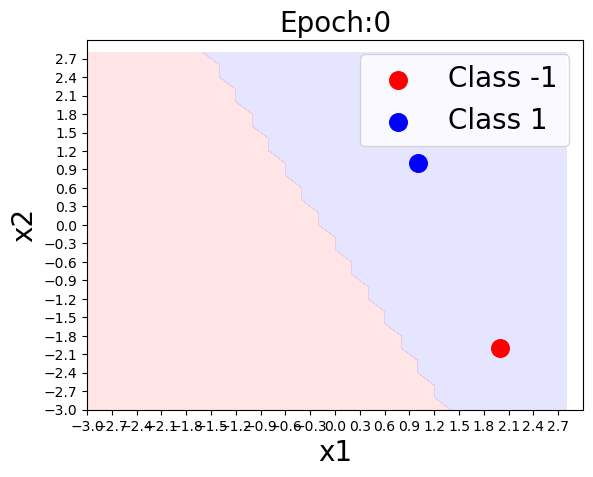

In [28]:
# each matrix row: up to last row = inputs, last row = y (classification)
		   # Bias 	f1 		f2 		y
matrix = [	[1.00,	1,	1,	1.0],
			[1.00,	2,	-2,	-1]]

# initial weights specified in problem (---> A- model representation)
weights= [	 0,	1.00,  0.5		] 
plot(matrix,weights,title="Epoch:0")
				
nb_epoch= 10
l_rate= 0.2

1
The training point 1 is classified correctly
1
The training point 2 is classified Incorrectly


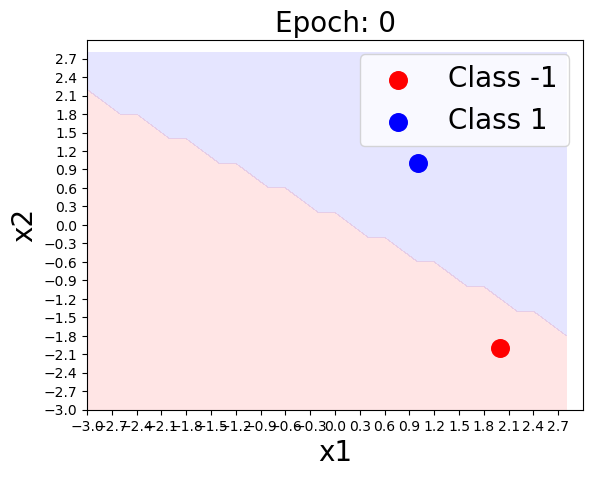

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


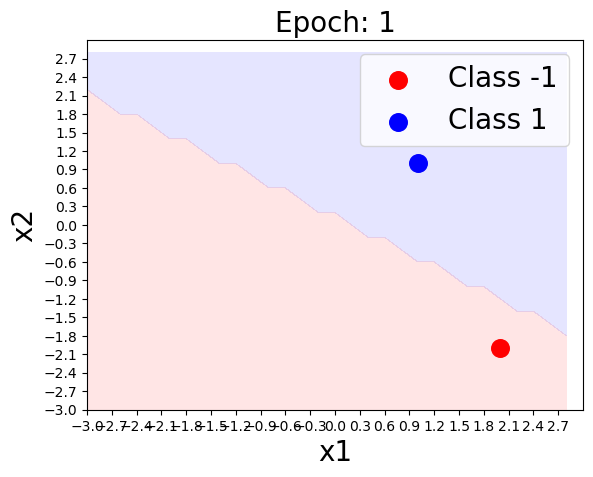

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


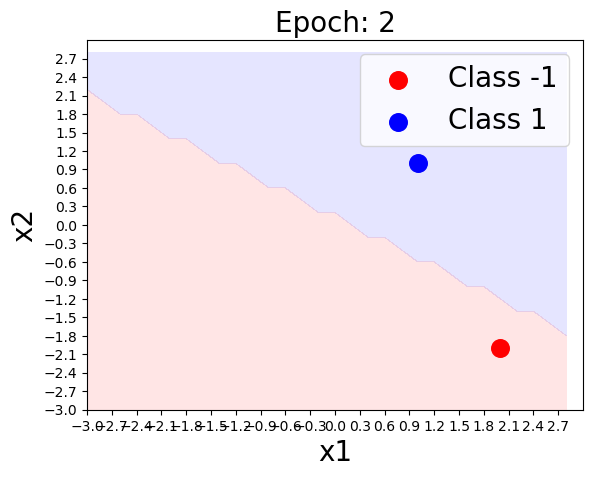

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


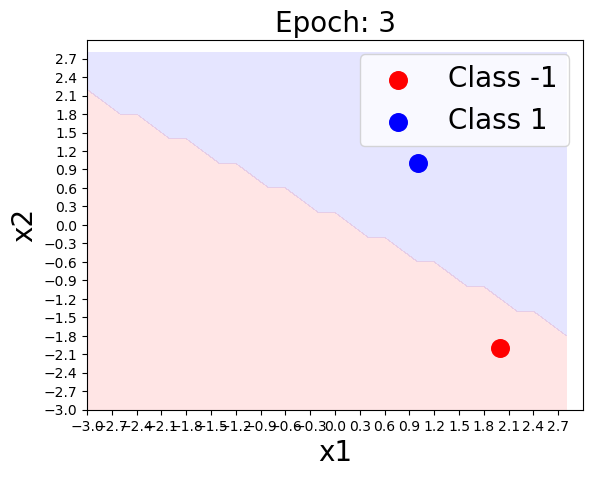

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


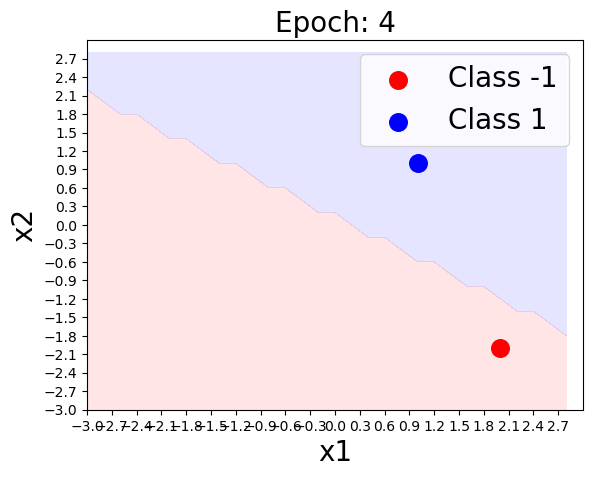

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


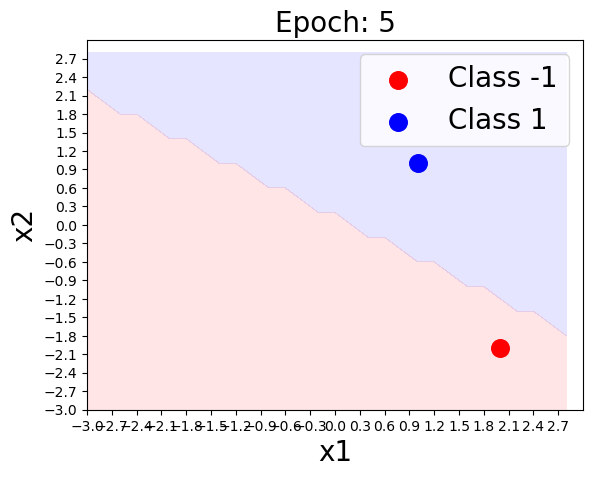

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


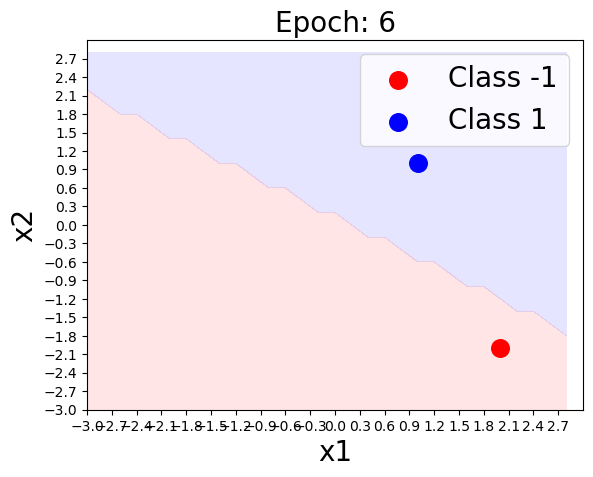

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


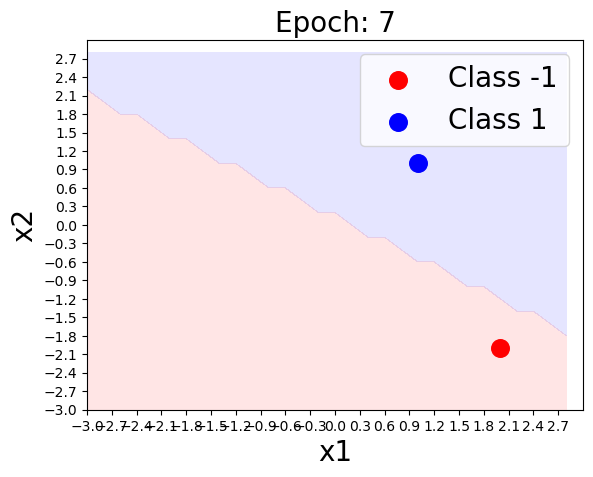

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


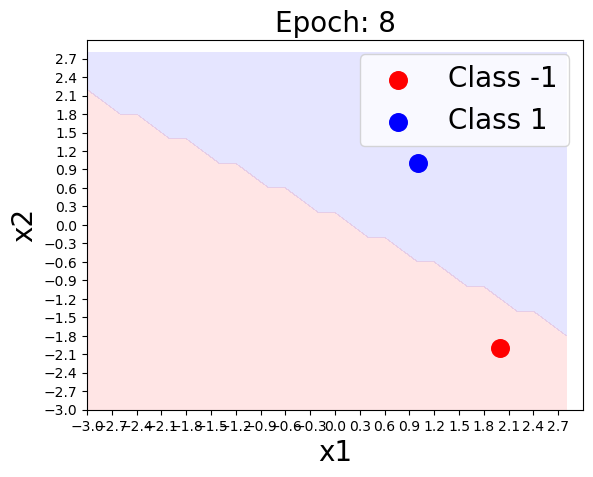

1
The training point 1 is classified correctly
-1
The training point 2 is classified correctly


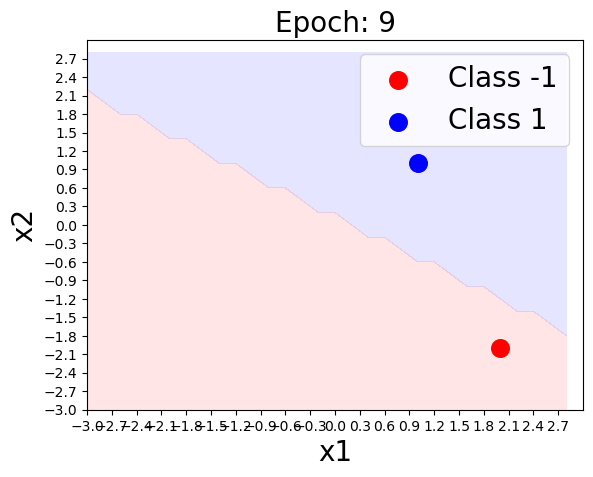

In [30]:
## Training 
for epoch in range(0,nb_epoch):
	#print(epoch)
	for i in range(len(matrix)):
		# ---> B-Model evaluation: 
		# ------->	B1- calculating predictions
		# ------->	B2- compare predictions (classifications) with target values	
		wTX = np.array(matrix[i][:-1])*np.array(weights) # get predicted classification
		if (np.sum(wTX))>=0:
			pred=1
		else:
			pred=-1
		print(pred)
		if pred==int(matrix[i][-1]):
			print('The training point ' + str(i+1) + ' is classified correctly')
		else:
			print('The training point ' + str(i+1) + ' is classified Incorrectly')
		# get error from real classification
		if int(matrix[i][-1])==pred:
			error=0
		else:
			error=1
    # ---> C-Model update (optimization)
		if error!=0:
			for j in range(len(weights)): 				 # calculate new weight for each node
				weights[j] = weights[j]+(l_rate*matrix[i][j]*matrix[i][-1]) 
	plot(matrix,weights,title="Epoch: %d"%epoch)